In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [2]:
data = tf.keras.utils.image_dataset_from_directory('R:\\Traffic\\Data\\accident_main//')

Found 989 files belonging to 2 classes.


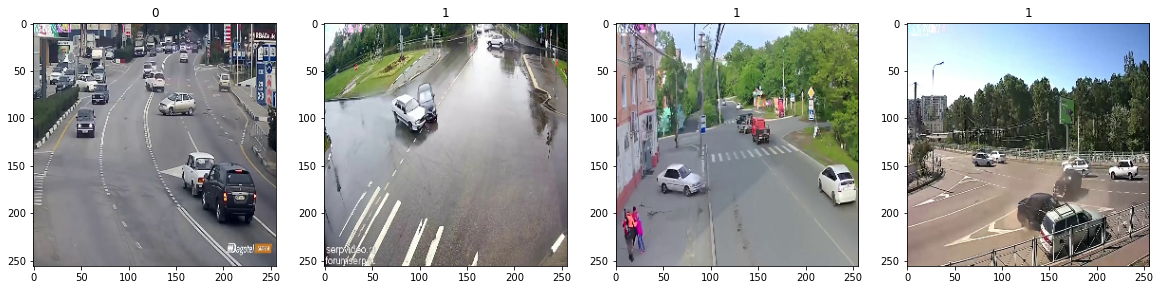

In [3]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [4]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.        , 0.04742647, 0.03063725],
          [0.01421569, 0.03382353, 0.05735294],
          [0.08480392, 0.13762255, 0.16041666],
          ...,
          [0.16752452, 0.28125   , 0.3047794 ],
          [0.09191176, 0.19779412, 0.2252451 ],
          [0.15404412, 0.25992647, 0.28737745]],
 
         [[0.0247549 , 0.02916667, 0.07291666],
          [0.11838235, 0.33431372, 0.3752451 ],
          [0.15502451, 0.38860294, 0.46482843],
          ...,
          [0.1875    , 0.30122548, 0.3247549 ],
          [0.1742647 , 0.28799018, 0.3115196 ],
          [0.15919118, 0.2707108 , 0.29534313]],
 
         [[0.        , 0.08284314, 0.11029412],
          [0.3305147 , 0.8143382 , 0.8969363 ],
          [0.37095588, 0.7464461 , 0.8426471 ],
          ...,
          [0.18627451, 0.3       , 0.32352942],
          [0.18272059, 0.29644608, 0.3199755 ],
          [0.24620098, 0.35992646, 0.38345587]],
 
         ...,
 
         [[0.47058824, 0.49803922, 0.47058824],
          [0.46274

In [5]:
len(data)

31

In [6]:
train_size = int(len(data)*.7)+3
val_size = int(len(data)*.2)-1
test_size = int(len(data)*.1)-1

In [7]:
print(train_size, val_size, test_size)

24 5 2


In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [9]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [12]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
24/24 [==============================] - 23s 626ms/step - loss: 0.7464 - accuracy: 0.5859 - val_loss: 0.6401 - val_accuracy: 0.6438
Epoch 2/25
24/24 [==============================] - 16s 632ms/step - loss: 0.6101 - accuracy: 0.6536 - val_loss: 0.5488 - val_accuracy: 0.7188
Epoch 3/25
24/24 [==============================] - 16s 636ms/step - loss: 0.5290 - accuracy: 0.7318 - val_loss: 0.4920 - val_accuracy: 0.7937
Epoch 4/25
24/24 [==============================] - 17s 667ms/step - loss: 0.4784 - accuracy: 0.7878 - val_loss: 0.3960 - val_accuracy: 0.8313
Epoch 5/25
24/24 [==============================] - 16s 669ms/step - loss: 0.4257 - accuracy: 0.8060 - val_loss: 0.4356 - val_accuracy: 0.8125
Epoch 6/25
24/24 [==============================] - 16s 640ms/step - loss: 0.3458 - accuracy: 0.8737 - val_loss: 0.2828 - val_accuracy: 0.8938
Epoch 7/25
24/24 [==============================] - 17s 668ms/step - loss: 0.3235 - accuracy: 0.8503 - val_loss: 0.3380 - val_accuracy: 0.8250

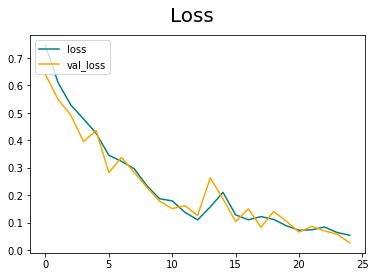

In [14]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

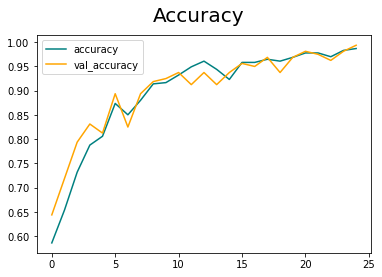

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [16]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [17]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 0.9655172 0.98275864


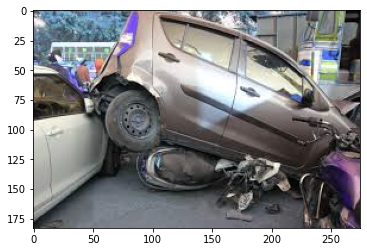

In [64]:
img = cv2.imread('R:\\Traffic\\Accident\\test\\acc.jpg')
plt.imshow(img)
plt.show()

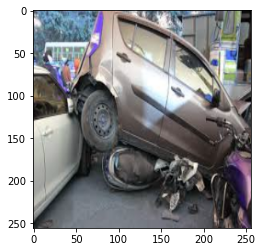

In [65]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [67]:
yhat

array([[0.99998295]], dtype=float32)

In [68]:
if yhat > 0.3: 
    print('Accident')
else:
    print('No Accident')

Accident


In [69]:
model.save(os.path.join('models','accident_main.h5'))